In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Pre-Processing

In [213]:
user_data=pd.read_csv('application_record.csv')
record=pd.read_csv('credit_record.csv')

In [214]:
user_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [215]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## 1.1) Setting up target values to binary type

In [216]:
record['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [217]:
record=record.replace({"STATUS":{'X':-1,'C':-1}})

In [218]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,-1


In [219]:
record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [220]:
record['STATUS']=record['STATUS'].astype('int64')
record.dtypes

ID                int64
MONTHS_BALANCE    int64
STATUS            int64
dtype: object

In [221]:
record['STATUS']=record['STATUS']+1

In [222]:
record=record.groupby('ID').max('STATUS') 
record.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,1
5001712,0,1
5001713,0,0
5001714,0,0
5001715,0,0


## 1.2) Merging Record data with the Personal Data

In [223]:
record=pd.merge(user_data,record,how='inner',on='ID')
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,0


# 2) Visualization 

## 2.1) Stacked Bar

### 2.1.1) Housing Type  

In [224]:
pivot_bar_housing=record.pivot_table(values='ID',index='NAME_HOUSING_TYPE',columns='STATUS',aggfunc=np.size)

In [225]:
pivot_bar_housing.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_housing

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
NAME_HOUSING_TYPE,,,,,,,
Co-op apartment,30.0,124.0,11.0,NaN,1.0,NaN,2.0
House / apartment,3967.0,24799.0,3242.0,280.0,66.0,39.0,155.0
Municipal apartment,145.0,833.0,120.0,8.0,5.0,5.0,12.0
Office apartment,34.0,190.0,29.0,5.0,2.0,NaN,2.0
Rented apartment,65.0,430.0,72.0,3.0,1.0,NaN,4.0
With parents,214.0,1335.0,201.0,18.0,1.0,2.0,5.0


In [226]:
piv_bar_excel_housing = pd.ExcelWriter('pivot_housing_vs_dues.xlsx')
pivot_bar_housing.to_excel(piv_bar_excel_housing)
piv_bar_excel_housing.save()

### 2.1.2) Education Type

In [227]:
pivot_bar_education=record.pivot_table(values='ID',index='NAME_EDUCATION_TYPE',columns='STATUS',aggfunc=np.size)
pivot_bar_education=pivot_bar_education.reindex(index=['Academic degree','Higher education','Incomplete higher','Secondary / secondary special','Lower secondary'])

In [228]:
pivot_bar_education.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_education

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
NAME_EDUCATION_TYPE,,,,,,,
Academic degree,4.0,21.0,7.0,NaN,NaN,NaN,NaN
Higher education,1265.0,7451.0,977.0,80.0,24.0,10.0,57.0
Incomplete higher,152.0,1051.0,174.0,13.0,4.0,9.0,7.0
Secondary / secondary special,2996.0,18891.0,2488.0,218.0,48.0,26.0,110.0
Lower secondary,38.0,297.0,29.0,3.0,NaN,1.0,6.0


In [229]:
piv_bar_excel_education = pd.ExcelWriter('pivot_education_vs_dues.xlsx')
pivot_bar_education.to_excel(piv_bar_excel_education)
piv_bar_excel_education.save()

### 2.1.3) Income Type

In [230]:
pivot_bar_incometype=record.pivot_table(values='ID',index='NAME_INCOME_TYPE',columns='STATUS',aggfunc=np.size)

In [231]:
pivot_bar_incometype.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_incometype

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
NAME_INCOME_TYPE,,,,,,,
Commercial associate,1096.0,6314.0,937.0,60.0,14.0,20.0,49.0
Pensioner,752.0,4756.0,514.0,59.0,26.0,7.0,38.0
State servant,349.0,2251.0,348.0,18.0,8.0,NaN,11.0
Student,NaN,10.0,1.0,NaN,NaN,NaN,NaN
Working,2258.0,14380.0,1875.0,177.0,28.0,19.0,82.0


In [232]:
piv_bar_excel_incometype = pd.ExcelWriter('pivot_incometype_vs_dues.xlsx')
pivot_bar_incometype.to_excel(piv_bar_excel_incometype)
piv_bar_excel_incometype.save()

### 2.1.4) Family Status 

In [233]:
pivot_bar_familystatus=record.pivot_table(values='ID',index='NAME_FAMILY_STATUS',columns='STATUS',aggfunc=np.size)

In [234]:
pivot_bar_familystatus.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_familystatus

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
NAME_FAMILY_STATUS,,,,,,,
Civil marriage,380.0,2198.0,321.0,38.0,2.0,NaN,6.0
Married,3061.0,19073.0,2521.0,195.0,48.0,25.0,125.0
Separated,271.0,1607.0,194.0,4.0,10.0,4.0,13.0
Single / not married,561.0,3645.0,522.0,50.0,6.0,16.0,29.0
Widow,182.0,1188.0,117.0,27.0,10.0,1.0,7.0


In [235]:
piv_bar_excel_familystatus = pd.ExcelWriter('pivot_familystatus_vs_dues.xlsx')
pivot_bar_familystatus.to_excel(piv_bar_excel_familystatus)
piv_bar_excel_familystatus.save()

### 2.1.5) Gender

In [236]:
pivot_bar_gender=record.pivot_table(values='ID',index='CODE_GENDER',columns='STATUS',aggfunc=np.size)

In [237]:
pivot_bar_gender.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_gender.index=['Female','Male']
pivot_bar_gender

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
Female,2960,18712,2379,193,54,21,111
Male,1495,8999,1296,121,22,25,69


In [238]:
piv_bar_excel_gender = pd.ExcelWriter('pivot_gender_vs_dues.xlsx')
pivot_bar_gender.to_excel(piv_bar_excel_gender)
piv_bar_excel_gender.save()

### 2.1.6) Occupation Type

In [239]:
pivot_bar_occupation=record.pivot_table(values='ID',index='OCCUPATION_TYPE',columns='STATUS',aggfunc=np.size)

In [240]:
pivot_bar_occupation.columns=['Dues Paid','Due 1 Month','Due 2 Months','Due 3 Months','Due 4 Months','Due 5 Months','Due 6 Months']
pivot_bar_occupation

,Dues Paid,Due 1 Month,Due 2 Months,Due 3 Months,Due 4 Months,Due 5 Months,Due 6 Months
OCCUPATION_TYPE,,,,,,,
Accountants,175.0,919.0,124.0,16.0,2.0,2.0,3.0
Cleaning staff,56.0,432.0,58.0,2.0,1.0,NaN,2.0
Cooking staff,80.0,489.0,77.0,4.0,NaN,NaN,5.0
Core staff,464.0,2664.0,389.0,25.0,15.0,8.0,26.0
Drivers,259.0,1615.0,215.0,34.0,3.0,5.0,7.0
HR staff,11.0,60.0,13.0,1.0,NaN,NaN,NaN
High skill tech staff,152.0,1050.0,151.0,17.0,1.0,2.0,10.0
IT staff,8.0,41.0,8.0,1.0,NaN,NaN,2.0
Laborers,812.0,4669.0,631.0,51.0,8.0,12.0,28.0


In [241]:
piv_bar_excel_occupation = pd.ExcelWriter('pivot_occupation_vs_dues.xlsx')
pivot_bar_occupation.to_excel(piv_bar_excel_occupation)
piv_bar_excel_occupation.save()

## 2.2) Pie Chart

## 2.2.1) Gender

In [242]:
pie_chart_gender=record['CODE_GENDER'].value_counts()
pie_chart_gender

F    24430
M    12027
Name: CODE_GENDER, dtype: int64

In [243]:
pie_chart_excel_gender = pd.ExcelWriter('pie_chart_gender.xlsx')
pie_chart_gender.to_excel(pie_chart_excel_gender)
pie_chart_excel_gender.save()

### 2.2.2) Status

In [244]:
pie_chart_status=record['STATUS'].value_counts()
pie_chart_status

1    27711
0     4455
2     3675
3      314
6      180
4       76
5       46
Name: STATUS, dtype: int64

In [245]:
pie_chart_excel_status = pd.ExcelWriter('pie_chart_status.xlsx')
pie_chart_status.to_excel(pie_chart_excel_status)
pie_chart_excel_status.save()

# 3) Pre-Processing for ML 

In [246]:
record['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [247]:
record['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [248]:
record['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [249]:
from function_file import change_to_bi

In [250]:
change_to_bi(record,'CODE_GENDER')
change_to_bi(record,'FLAG_OWN_CAR')
change_to_bi(record,'FLAG_OWN_REALTY')
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,2
1,5008805,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,2
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,0


In [251]:
record['NAME_EDUCATION_TYPE'].unique() # special type of categorical value

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [252]:
record['NAME_EDUCATION_TYPE']=record['NAME_EDUCATION_TYPE'].replace(['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'],[0,1,2,3,4])
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,0,0,0,427500.0,Working,3,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,2
1,5008805,0,0,0,0,427500.0,Working,3,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,2
2,5008806,0,0,0,0,112500.0,Working,1,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
3,5008808,1,1,0,0,270000.0,Commercial associate,1,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,1,1,0,0,270000.0,Commercial associate,1,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,0


In [253]:
record['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [254]:
record['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [255]:
record['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [256]:
record['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [257]:
from function_file import change_to_num # execute this code, if not installed : !pip install ipynb

In [258]:
change_to_num(record,'NAME_INCOME_TYPE')
change_to_num(record,'NAME_FAMILY_STATUS')
change_to_num(record,'NAME_HOUSING_TYPE')
change_to_num(record,'OCCUPATION_TYPE')
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2.0,0,2
1,5008805,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2.0,0,2
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,0,1
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,0,1
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,-22,0


In [259]:
record.loc[record['STATUS']<=0,'STATUS']=0
record.loc[record['STATUS']>0,'STATUS']=1  # on or off
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2.0,0,1
1,5008805,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2.0,0,1
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,0,1
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,0,1
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,-22,0


In [260]:
record[record['STATUS']==0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,-22,0
12,5008819,0,0,0,0,135000.0,1,1,1,1,-17778,-1194,1,0,0,0,4,2.0,-10,0
44,5008857,1,0,0,2,135000.0,0,1,1,1,-15761,-3173,1,0,0,0,4,4.0,0,0
55,5112846,1,0,0,2,135000.0,0,1,1,1,-15761,-3173,1,0,0,0,4,4.0,-15,0
76,5008893,1,1,0,0,297000.0,1,1,2,0,-15519,-3234,1,0,0,0,4,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36079,5150409,0,0,0,2,157500.0,0,1,1,1,-14312,-4480,1,1,1,0,4,4.0,0,0
36080,5150410,1,1,0,0,67500.0,2,1,4,1,-22116,365243,1,0,0,0,0,1.0,-21,0
36091,5150422,1,1,0,0,67500.0,2,1,4,1,-22116,365243,1,0,0,0,0,1.0,0,0
36097,5150460,1,0,0,1,112500.0,0,1,1,1,-14234,-309,1,0,0,0,7,3.0,0,0


In [261]:
record[record['STATUS']==1]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2.0,0,1
1,5008805,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2.0,0,1
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,0,1
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,0,1
5,5008810,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,0,0,0,315000.0,0,1,1,1,-17348,-2420,1,0,0,0,5,2.0,0,1
36453,5149834,1,1,0,0,157500.0,1,3,1,1,-12387,-1325,1,0,1,1,13,2.0,0,1
36454,5149838,1,1,0,0,157500.0,2,3,1,1,-12387,-1325,1,0,1,1,13,2.0,0,1
36455,5150049,1,1,0,0,283500.0,0,1,1,1,-17958,-655,1,0,0,0,2,2.0,0,1


# 4) Correlation

In [262]:
record_corr=record

In [263]:
record_corr.corr()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
ID,1.000000,-0.012022,0.011163,0.098851,0.028878,-0.017667,-0.022184,0.010222,-0.018516,0.038670,0.056016,-0.038043,NaN,0.079215,0.009879,-0.046979,0.023777,0.026624,0.025194,-0.011491
CODE_GENDER,-0.012022,1.000000,0.361379,-0.050758,-0.077690,-0.197805,0.158594,0.008005,0.125867,-0.053499,-0.202352,0.173434,NaN,-0.064994,0.026833,0.003284,-0.024118,-0.110782,-0.019244,0.004509
FLAG_OWN_CAR,0.011163,0.361379,1.000000,-0.015185,-0.105839,-0.215506,0.110925,-0.103529,0.119062,-0.025786,-0.157144,0.156452,NaN,-0.021644,0.014019,-0.021750,-0.043543,-0.151814,-0.002024,0.004901
FLAG_OWN_REALTY,0.098851,-0.050758,-0.015185,1.000000,0.000575,-0.032719,-0.049448,0.010563,-0.022472,0.163836,0.129838,-0.093006,NaN,0.207732,0.066601,-0.052194,0.033788,0.005723,0.041246,-0.002605
CNT_CHILDREN,0.028878,-0.077690,-0.105839,0.000575,1.000000,0.033691,-0.126058,0.051372,-0.131353,0.042399,0.339357,-0.229379,NaN,0.048091,-0.016291,0.015960,0.109439,0.889114,-0.011469,0.003842
AMT_INCOME_TOTAL,-0.017667,-0.197805,-0.215506,-0.032719,0.033691,1.000000,-0.012952,0.231710,-0.006935,-0.003048,0.067908,-0.168611,NaN,-0.037746,0.017245,0.086681,0.057708,0.023750,0.008727,-0.014412
NAME_INCOME_TYPE,-0.022184,0.158594,0.110925,-0.049448,-0.126058,-0.012952,1.000000,0.028331,0.079021,-0.026526,-0.346406,0.535658,NaN,-0.183092,-0.009797,-0.021901,-0.159980,-0.123481,-0.006844,-0.000535
NAME_EDUCATION_TYPE,0.010222,0.008005,-0.103529,0.010563,0.051372,0.231710,0.028331,1.000000,-0.016865,0.041232,0.164892,-0.129466,NaN,0.017085,0.044684,0.097946,0.022099,0.042220,-0.002106,-0.009940
NAME_FAMILY_STATUS,-0.018516,0.125867,0.119062,-0.022472,-0.131353,-0.006935,0.079021,-0.016865,1.000000,-0.015167,-0.170975,0.143766,NaN,-0.059966,0.002918,-0.020668,-0.050474,-0.497094,-0.006984,0.003593
NAME_HOUSING_TYPE,0.038670,-0.053499,-0.025786,0.163836,0.042399,-0.003048,-0.026526,0.041232,-0.015167,1.000000,0.137401,-0.082201,NaN,0.023633,-0.009420,-0.013272,0.038900,0.031604,0.004540,-0.005851


In [264]:
record_corr=record_corr.drop(['ID','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','MONTHS_BALANCE'],axis=1)

In [265]:
record_corr.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
CNT_CHILDREN,1.000000,0.033691,0.051372,0.339357,-0.229379,0.889114,0.003842
AMT_INCOME_TOTAL,0.033691,1.000000,0.231710,0.067908,-0.168611,0.023750,-0.014412
NAME_EDUCATION_TYPE,0.051372,0.231710,1.000000,0.164892,-0.129466,0.042220,-0.009940
DAYS_BIRTH,0.339357,0.067908,0.164892,1.000000,-0.616213,0.304020,-0.002712
DAYS_EMPLOYED,-0.229379,-0.168611,-0.129466,-0.616213,1.000000,-0.221241,-0.000637
CNT_FAM_MEMBERS,0.889114,0.023750,0.042220,0.304020,-0.221241,1.000000,0.001388
STATUS,0.003842,-0.014412,-0.009940,-0.002712,-0.000637,0.001388,1.000000


<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

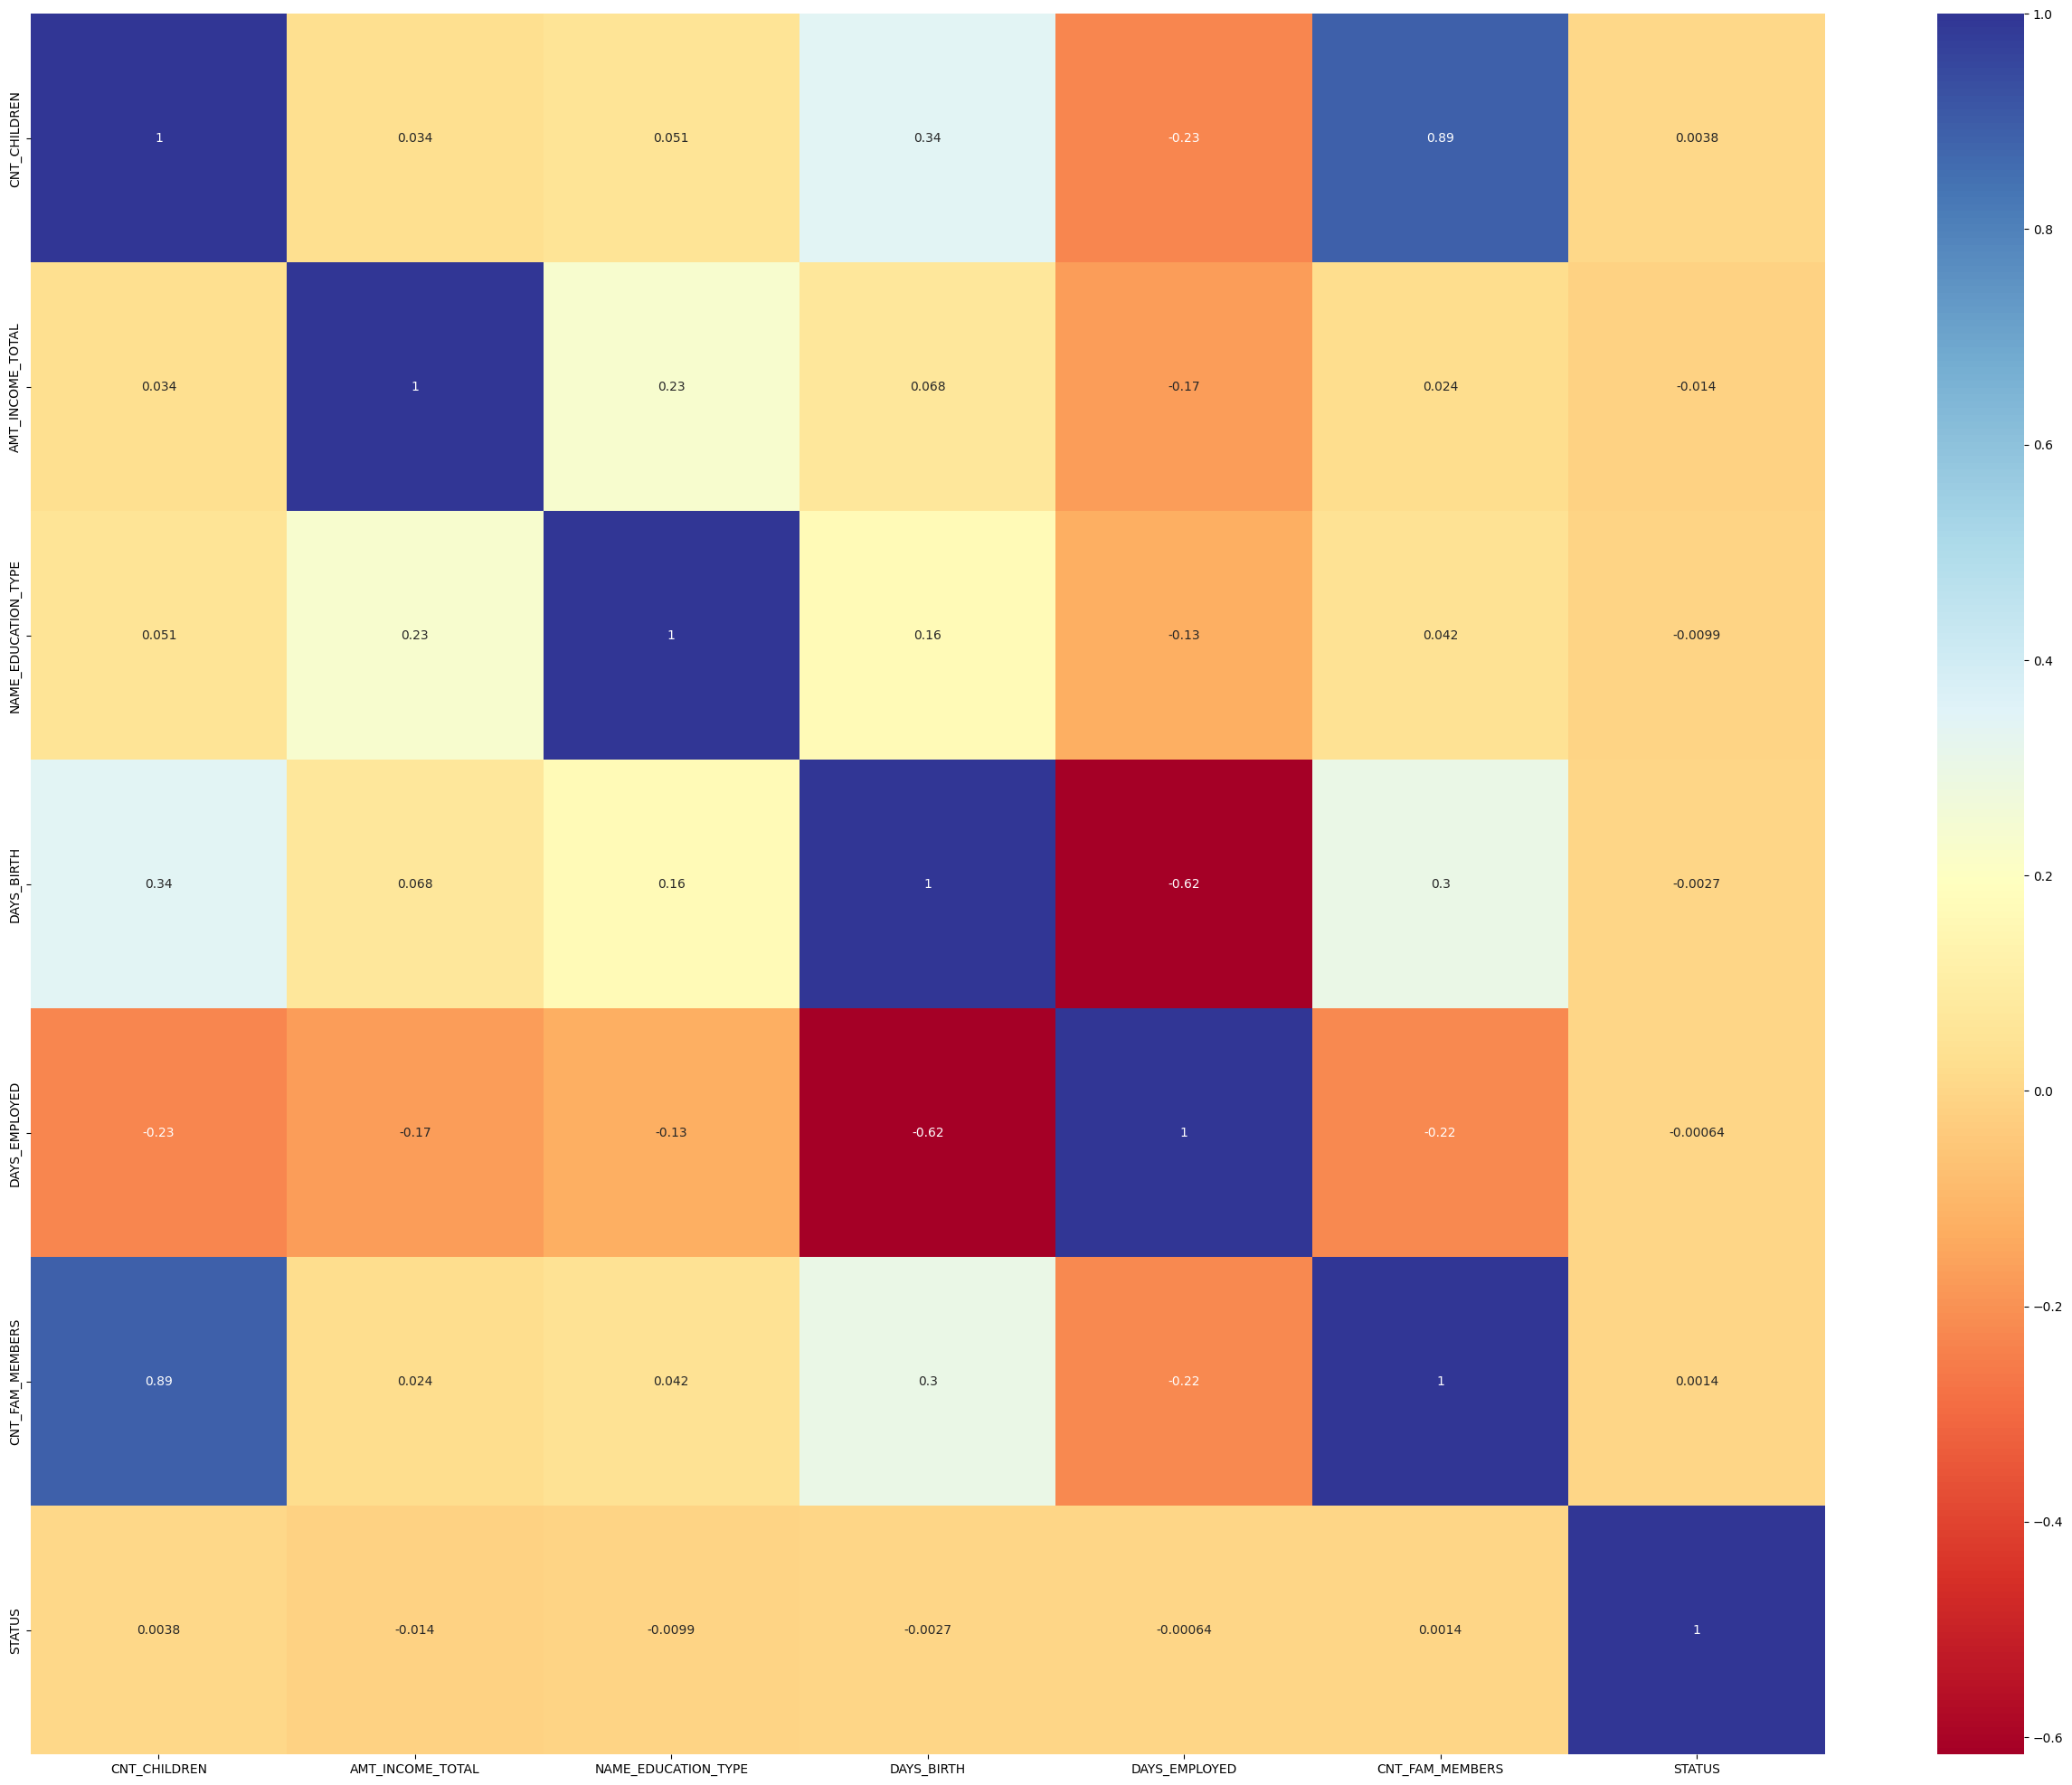

In [266]:
plt.figure(1)
plt.figure(figsize=(32,25))
sns.heatmap(record_corr.corr(),annot=True,cmap='RdYlBu')

# 5) Pre Processing based on coorelation graph

In [267]:
record=record.drop(['MONTHS_BALANCE','ID'],axis=1)
record

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2.0,1
1,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,1,0,0,0,2.0,1
2,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,1
3,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,1
4,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,0,0,0,315000.0,0,1,1,1,-17348,-2420,1,0,0,0,5,2.0,1
36453,1,1,0,0,157500.0,1,3,1,1,-12387,-1325,1,0,1,1,13,2.0,1
36454,1,1,0,0,157500.0,2,3,1,1,-12387,-1325,1,0,1,1,13,2.0,1
36455,1,1,0,0,283500.0,0,1,1,1,-17958,-655,1,0,0,0,2,2.0,1


In [268]:
X=record.drop(['FLAG_MOBIL'],axis=1)
X=X.drop(['STATUS'],axis=1) # reference coorelation graph where coorelation is zero
Y=record['STATUS']

In [269]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,0,0,0,2.0
1,0,0,0,0,427500.0,0,3,0,0,-12005,-4542,1,0,0,0,2.0
2,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,0,0,0,1,2.0
3,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,0,1,1,2,1.0
4,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,0,1,1,2,1.0


In [270]:
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: STATUS, dtype: int64

# 6) Resampling

In [271]:
from imblearn.combine import SMOTETomek

In [272]:
X.shape

(36457, 16)

In [273]:
Y.shape

(36457,)

In [274]:
smk=SMOTETomek(random_state=12)
X,Y=smk.fit_resample(X,Y)

In [275]:
X.shape

(63446, 16)

In [276]:
Y.shape

(63446,)

# 7) PCA

In [277]:
from sklearn import decomposition
from sklearn import datasets

In [278]:
pca = decomposition.PCA(n_components=16)
pca.fit_transform(X)
print(pca.explained_variance_ratio_)
pca.fit(X)
X = pca.transform(X)

[6.65651658e-01 3.33988156e-01 3.60185763e-04 3.27925927e-10
 3.91076020e-11 2.53308354e-11 1.89077722e-11 1.87074408e-11
 1.16066196e-11 9.82605449e-12 7.97333030e-12 5.74480039e-12
 4.91207070e-12 3.54292845e-12 2.04985835e-12 1.19498429e-12]


AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [ ]:
X.shape

# 8) Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=59562)

# 9) ML Prediction